<a href="https://colab.research.google.com/github/Antoney20/Data-analysis/blob/master/leaf_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import *

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.2.2-cp310-cp310-linux_x86_64.whl size=12292144 sha256=5cfb72e4dfb170d6628e807e745bbd52597c435383bb142e72fbfb2a8012245c
  Stored in directory: /root/.cache/pip/wheels/bb/81/f3/48b8bd245846ae69fcb2281c84e848bfea1f5260a870c148ae
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.2.2 which is incompatible.
plotnine 0.10.1 requires matplot

In [ ]:
dataset, info = tfds.load('beans', with_info=True)

In [ ]:
info

tfds.core.DatasetInfo(
    name='beans',
    full_name='beans/0.1.0',
    description="""
    Beans is a dataset of images of beans taken in the field using smartphone
    cameras. It consists of 3 classes: 2 disease classes and the healthy class.
    Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated by
    experts from the National Crops Resources Research Institute (NaCRRI) in Uganda
    and collected by the Makerere AI research lab.
    """,
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    data_path='/root/tensorflow_datasets/beans/0.1.0',
    file_format=tfrecord,
    download_size=171.69 MiB,
    dataset_size=171.63 MiB,
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=128, num_shards=1>,
        'train': <Spli

In [ ]:
class_names = info.features['label'].names + ['unknown']
class_names

['angular_leaf_spot', 'bean_rust', 'healthy', 'unknown']

In [ ]:
# Map the class names to human readable names
name_map = dict(
    angular_leaf_spot='Angular Disease',
    bean_rust='Bean Rust',
    healthy='Healthy',
    unknown='Unknown')

print(len(class_names), 'classes:')
print(class_names)
print([name_map[name] for name in class_names])

4 classes:
['angular_leaf_spot', 'bean_rust', 'healthy', 'unknown']
['Angular Disease', 'Bean Rust', 'Healthy', 'Unknown']


In [ ]:
def preprocess_fn(data):
  image = data['image']

  # Normalize [0, 255] to [0, 1]
  image = tf.cast(image, tf.float32)
  image = image / 255.

  # Resize the images to 224 x 224
  image = tf.image.resize(image, (224, 224))

  data['image'] = image
  
  return data

TypeError: ignored

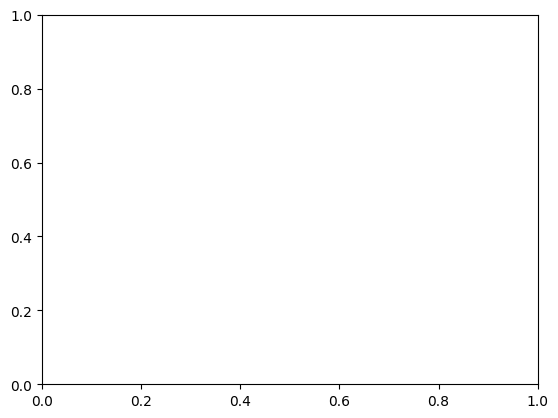

In [ ]:
batch = dataset['validation'].map(preprocess_fn).batch(25).as_numpy_iterator()
examples = next(batch)
plot(examples)

In [ ]:
classifier = hub.KerasLayer('https://tfhub.dev/google/cropnet/classifier/beans_disease_V1/2')
probabilities = classifier(examples['image'])
predictions = tf.argmax(probabilities, axis=-1)